In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [55]:
#read the file and clean the data
df = pd.read_csv('/Users/ritika/kaggle_projects/MSFOS/Data/df_15.csv')
df = df[['X0MATERIAL','ZDEPMENT','X0PLANT','X0CALDAY','X0CALMONTH','X0CALYEAR','qty']]
df = df[df['X0PLANT'].notna()]
df['X0CALDAY'] = pd.to_datetime(df['X0CALDAY'],format='%Y%m%d')
#df.info()
#df.head()
#df.columns

In [56]:
#Aggregate the data at Department level:
df_grp_dep =df.groupby(['ZDEPMENT','X0CALDAY'])['qty'].sum()
df_grp_dep=df_grp_dep.reset_index()
#df_grp_dep

In [57]:
#decompose the series

df_grp_dep=df_grp_dep[['X0CALDAY','qty']]


In [58]:
#Fill up the missing dates
r = pd.date_range(start=df_grp_dep.X0CALDAY.min(), end=df_grp_dep.X0CALDAY.max())
df_grp_dep=df_grp_dep.set_index('X0CALDAY').reindex(r).fillna(0.0).rename_axis('X0CALDAY').reset_index()

<AxesSubplot:xlabel='X0CALDAY'>

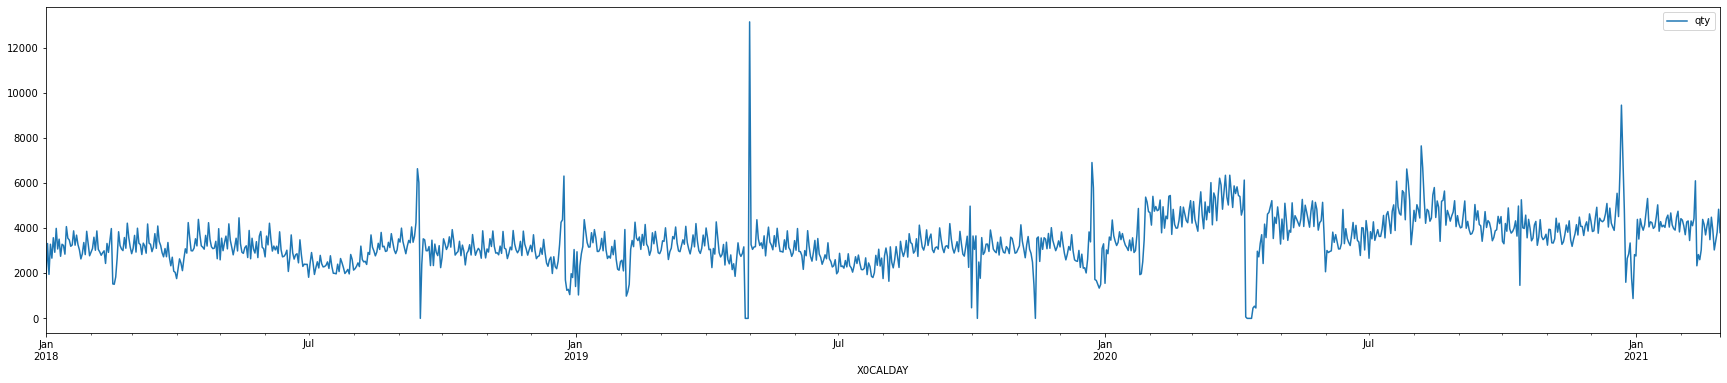

In [60]:
df_grp_dep.plot(kind='line',x='X0CALDAY',y='qty',figsize=(30, 6))

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df_grp_dep['qty'], model='additive',period=365)

<AxesSubplot:>

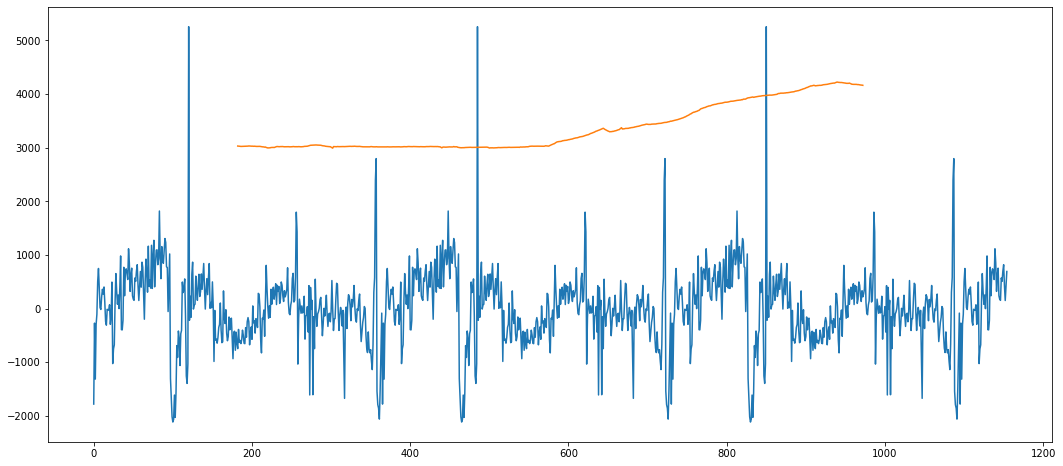

In [62]:
result.seasonal.plot()
result.trend.plot()

In [63]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8


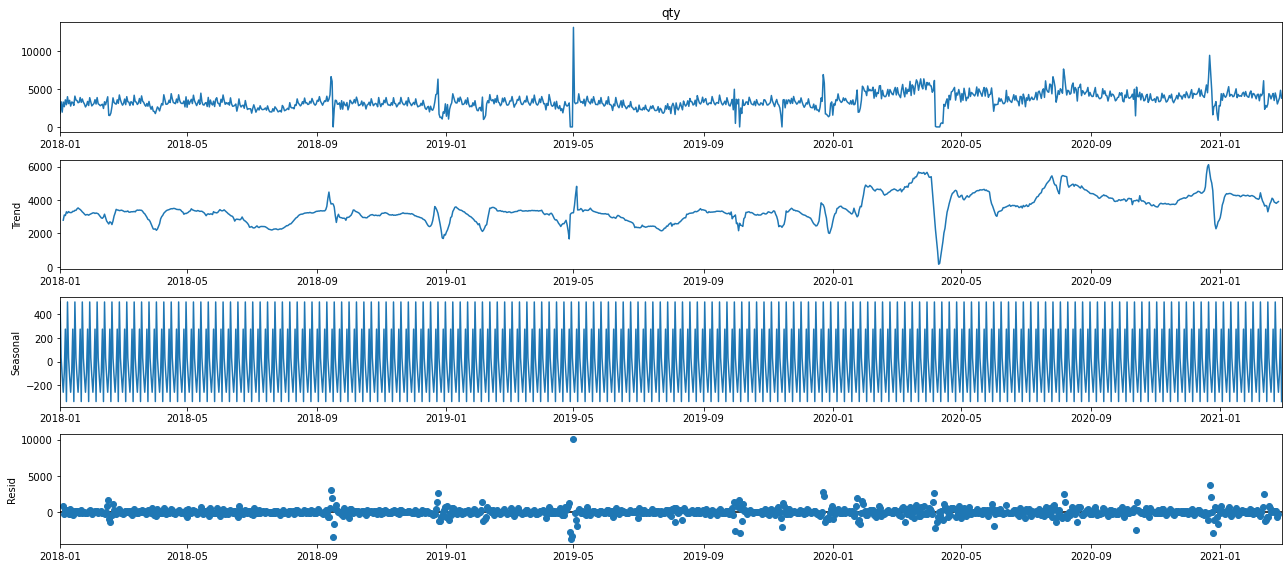

In [64]:
df_grp_dep=df_grp_dep.reset_index()
#df_grp_dep=df_grp_dep[df_grp_dep.X0CALDAY.between('2019-05-01','2019-05-30')]
df_grp_dep = df_grp_dep.set_index('X0CALDAY')

decomposition = sm.tsa.seasonal_decompose(df_grp_dep['qty'], model='additive')
fig=decomposition.plot()

In [84]:
#df_grp_dep=df_grp_dep['qty']
#df_grp_dep=pd.DataFrame(df_grp_dep)
type(df_grp_dep)

pandas.core.frame.DataFrame

Text(0, 0.5, 'qty')

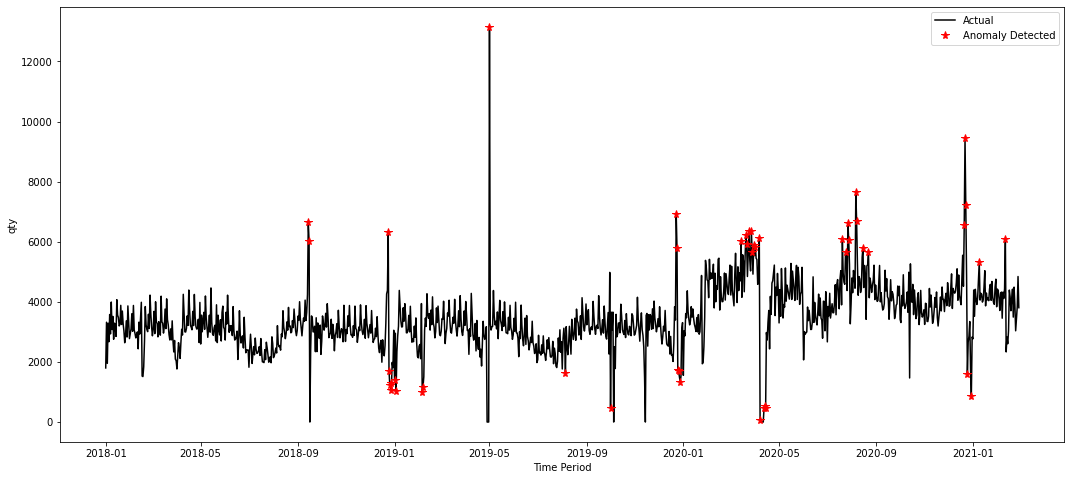

In [36]:
#Find outliers in the data
from sklearn.cluster import DBSCAN
clustering1 = DBSCAN(eps=40, min_samples=6).fit(np.array(df_grp_dep['qty']).reshape(-1,1))

labels = clustering1.labels_

outlier_pos = np.where(labels == -1)[0]

x = []; y = [];
for pos in outlier_pos:
    x.append(np.array(df_grp_dep['qty'])[pos])
    y.append(df_grp_dep['qty'].index[pos])
    
plt.plot(df_grp_dep['qty'].loc[df_grp_dep['qty'].index], 'k-')
plt.plot(y,x,'r*', markersize=8)  
plt.legend(['Actual', 'Anomaly Detected'])
plt.xlabel('Time Period')
#plt.xticks([0, 20, 40, 60, 80, 99],[df_grp_dep.index[0],df_grp_dep.index[20], df_grp_dep.index[40], df_grp_dep.index[60], df_grp_dep.index[80], df_grp_dep.index[99]] ,rotation=45)
plt.ylabel('qty')

In [87]:

from pyod.models.copod import COPOD
clf = COPOD()
clf.fit(df_grp_dep)

# get outlier scores
y_train_scores = clf.decision_scores_  # raw outlier scores on the train data
#y_test_scores = clf.decision_function(X_test)  # predict raw outlier scores on test
y_train_scores

array([1.6751646 , 0.70446641, 1.57288615, ..., 1.17132264, 2.54099612,
       1.15195827])